In [78]:
import numpy as np
import pandas as pd
import requests
import os
# !pip install tweepy
import tweepy
import matplotlib.pyplot as plt
from tweepy import OAuthHandler

### Data Gathering

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_copy =twitter_archive.copy()

In [4]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Creating a folder


In [6]:
folder = "Image_Predictions"

if not os.path.exists(folder):
    os.makedirs(folder)

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [8]:
info = requests.get(url)

In [9]:
content = info.content

In [10]:
with open(os.path.join(folder, url.split("/")[-1]), mode ="wb") as file:
    file.write(content)

In [11]:
image_predictions =pd.read_csv("Image_Predictions/image-predictions.tsv",sep='\t')


In [12]:
image_predictions_copy = image_predictions.copy()

In [13]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


In [16]:

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [17]:
api = tweepy.API(auth)


In [18]:
tweet_ids = twitter_archive_copy["tweet_id"].values

In [19]:
# import json
# count = 0
# with open('tweet_json.txt', 'w') as outfile:
# #     This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except:
#            print("unavailable tweet")

        

In [20]:
# import json
# count = 0
# dictkeys = {'id','full_text','retweet_count','favorite_count'}

# with open('tweet_json.txt', 'w') as outfile:
# #     This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            data = tweet._json
            
#            dictionary = {key: data[key] for key in data.keys() & dictkeys}
#            print("Success")
#            json.dump(dictionary._json, outfile)
#            outfile.write('\n')
#        except:
#            print("unavailable tweet")

        

In [21]:
extra_archive = pd.read_json('tweet_json.txt',  lines = True)
extra_archive_data = extra_archive.loc[:,['id','full_text','retweet_count','favorite_count']]

In [22]:
extra_archive_data_copy = extra_archive_data.copy()

### Accessing the Data

### `Data Quality Issues`

In [23]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
twitter_archive_copy.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2171,669328503091937280,NaN,NaN,2015-11-25 01:35:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,None,None,None,None
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,None,None,None,None
1289,708149363256774660,NaN,NaN,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,None,None,None,None
613,796865951799083009,NaN,NaN,2016-11-11 00:03:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,None,None,None,None
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None


In [25]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions_copy.duplicated().sum()

0

In [27]:
image_predictions_copy.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French_bulldog,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False
712,685321586178670592,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,1,Boston_bull,0.972483,True,French_bulldog,0.025469,True,boxer,0.000458,True


In [28]:
extra_archive_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1772 non-null   int64 
 1   full_text       1772 non-null   object
 2   retweet_count   1772 non-null   int64 
 3   favorite_count  1772 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 55.5+ KB


In [29]:
extra_archive_data_copy.duplicated().sum()

0

### Twitter archive dataset

- Some columns have incorrect datatype such as the timestamp,retweeted_status_timestamp
- The dataset contains missing values
- Some tweets are retweets not original tweets
- Some numerator and deominator value exceeds 10

### Image Predictions dataset

- The prediction contains other animals than dogs

### Extra Archive Dataset

- The dataset is cleaned

### `Untidy Issues`

### Twitter archive dataset

- The various type of dogs should be in a single column
- The tables should be joined

### Phase 3 :Cleaning

In [30]:
twitter_archive_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Define

Drop rows with retweeted_status_id

### Code

In [31]:
retweeted_tweets = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.notnull()].index.tolist()


In [32]:
twitter_archive_copy.drop(retweeted_tweets, axis=0, inplace=True)

### Test

In [33]:
twitter_archive_copy["retweeted_status_id"].notnull().sum()

0

   ### Define

- Drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id and in_reply_to_user_id in the twitter_archive_copy dataset  

### Code

In [34]:
twitter_archive_copy.drop(axis=1,columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp","in_reply_to_status_id","in_reply_to_user_id"], inplace=True)

### Test

In [35]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [36]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define

- Convert numerators exceeding 14 to 14
- Convert denominator to 14

### Code

In [37]:
# twitter_archive_copy[twitter_archive_copy["rating_numerator"] > 14] =14
# twitter_archive_copy["rating_denominator"] =14
twitter_archive_copy.loc[twitter_archive_copy.rating_numerator > 14,['rating_numerator']] = 14
twitter_archive_copy.loc[twitter_archive_copy.rating_numerator > 14,['rating_denominator']] = 14


### Test

In [38]:
# twitter_archive_copy["rating_numerator"].max()

In [39]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define

- Drop all rows with no data in expanded_urls column

### Code

In [40]:
twitter_archive_copy.dropna(inplace=True, subset =["expanded_urls"])

### Test

In [41]:
twitter_archive_copy["expanded_urls"].isnull().sum()

0

In [42]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### Define

- Convert timestamp  to datetime data type

### Code

In [43]:
twitter_archive_copy["timestamp"] = pd.to_datetime(twitter_archive_copy["timestamp"])

### Test

In [44]:
assert twitter_archive_copy["timestamp"].dtype == "datetime64[ns, UTC]"

In [45]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [46]:
twitter_archive_copy.sample(15)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2112,670435821946826752,2015-11-28 02:55:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,https://twitter.com/dog_rates/status/670435821...,10,10,None,None,None,None,None
1656,683357973142474752,2016-01-02 18:43:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
880,760539183865880579,2016-08-02 18:14:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Atlas. Swinging is his passion. 12/10 ...,https://twitter.com/dog_rates/status/760539183...,12,10,Atlas,None,None,None,None
1606,685667379192414208,2016-01-09 03:40:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
910,757611664640446465,2016-07-25 16:21:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
1806,676936541936185344,2015-12-16 01:27:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a rare pouched pupper. Ample stora...,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
178,857263160327368704,2017-04-26 16:00:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
2285,667188689915760640,2015-11-19 03:52:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None
2127,670319130621435904,2015-11-27 19:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
129,867421006826221569,2017-05-24 16:44:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo


### Define

- Merge the doggo, floofer, pupper and puppo columns to a dog_stage column.
- Convert the dog_stage to a category column
- Drop the columns doggo, floofer, pupper and puppo

### Code

In [47]:
twitter_archive_copy["dog_stage"] = twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [48]:
twitter_archive_copy["dog_stage"] =twitter_archive_copy["dog_stage"].astype("category")

In [49]:
twitter_archive_copy.drop(inplace=True, axis=1,columns =["doggo", "floofer", "pupper", "puppo"])

### Test

In [50]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### Define

- Replace None value in dog_stage column of twitter_archive_copy by np.nan
- Replace None value in name column of twitter_archive_copy by np.nan
- Replace "a" value in name column of twitter_archive_copy by np.nan


### Code

In [51]:
twitter_archive_copy.dog_stage.replace(to_replace="None",value=np.nan,inplace=True)
twitter_archive_copy.name.replace(to_replace=["None","a"],value=np.nan,inplace=True)

### Test

In [52]:
twitter_archive_copy.dog_stage.value_counts()

pupper     232
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Define

- Filter for probability of dogs only

### Code

In [53]:
dogs_only = image_predictions_copy.query('p1_dog == True | p2_dog == True | p3_dog == True')

In [54]:
dogs_only.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,Shih-Tzu,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True


### Test

In [55]:
dogs_only.query('p1_conf+p2_conf+p3_conf > 1')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [56]:
  dogs_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Define

- Rename id to tweet_id in extra_archive_data dataset

### Code

In [57]:
extra_archive_data_copy.rename({"id":"tweet_id"},axis=1,inplace=True)

### Test

In [58]:
extra_archive_data_copy.columns

Index(['tweet_id', 'full_text', 'retweet_count', 'favorite_count'], dtype='object')

In [59]:
dogs_only.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define

 - Use melt() function to make dogs_only tidy byu ensuring that prediction, confidence, and dog status are all separate variables

### Code

In [60]:

def melting(p1, p2, p3, value_name):
    df = dogs_only[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # change column names so that they do not have to be extracted later
    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name='prediction_num',
        value_name=value_name
    )
    return df

In [61]:
pred_names=melting('p1','p2','p3','prediction')
pred_names.head()

C:\Users\SELASI\AppData\Local\Temp\ipykernel_1012\3787046391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


,tweet_id,jpg_url,img_num,prediction_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher


In [62]:
predictions_conf = melting('p1_conf', 'p2_conf', 'p3_conf', 'confidence')
predictions_conf.head()

C:\Users\SELASI\AppData\Local\Temp\ipykernel_1012\3787046391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


,tweet_id,jpg_url,img_num,prediction_num,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,0.560311


In [63]:
dogs_only_cleaned =pred_names.merge(
    predictions_conf,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']
)

### Test

In [64]:
dogs_only_cleaned

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311
...,...,...,...,...,...,...
5248,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3,Indian_elephant,0.076902
5249,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,German_short-haired_pointer,0.175219
5250,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,spatula,0.040836
5251,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379


### Define

- Ensure that the column prediction in dogs_only_cleaned are all in lower case

### Code

In [65]:
dogs_only_cleaned.prediction =dogs_only_cleaned.prediction.str.lower()

### Test

In [66]:
dogs_only_cleaned.sample(10)

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence
4942,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,3,italian_greyhound,0.020412
2586,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,2,miniature_poodle,0.219661
798,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,1,cardigan,0.350993
3861,675149409102012420,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,1,3,tibetan_terrier,0.000029
2175,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,2,staffordshire_bullterrier,0.084395
926,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,1,pembroke,0.939134
2281,683773439333797890,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,1,2,labrador_retriever,0.057866
2094,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,2,french_bulldog,0.309978
184,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,1,sorrel,0.460370
897,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,1,tennis_ball,0.176495


### Combine all the tables 

In [67]:
twitter_archive_copy.shape

(2117, 9)

In [68]:
extra_archive_data_copy.shape

(1772, 4)

In [69]:
dogs_only_cleaned.shape

(5253, 6)

In [70]:
from functools import reduce
dfs = [twitter_archive_copy, extra_archive_data_copy, dogs_only_cleaned]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), dfs)

In [71]:
twitter_archive_master.to_csv("twitter_archive_master.csv",index=False)

In [72]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3759 entries, 0 to 3758
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            3759 non-null   int64              
 1   timestamp           3759 non-null   datetime64[ns, UTC]
 2   source              3759 non-null   object             
 3   text                3759 non-null   object             
 4   expanded_urls       3759 non-null   object             
 5   rating_numerator    3759 non-null   int64              
 6   rating_denominator  3759 non-null   int64              
 7   name                2781 non-null   object             
 8   dog_stage           594 non-null    category           
 9   full_text           3759 non-null   object             
 10  retweet_count       3759 non-null   int64              
 11  favorite_count      3759 non-null   int64              
 12  jpg_url             3759 non-null 

###  Insights and Visualizations

### Top 10 common Name for Dogs

In [74]:
twitter_archive_master.name.value_counts()

Charlie    27
Daisy      21
Cooper     21
Penny      21
Tucker     18
           ..
Dobby       3
Nimbus      3
Mack        3
Snicku      3
Torque      3
Name: name, Length: 682, dtype: int64

### Which are the most common dog stage?

In [73]:
twitter_archive_master.dog_stage.value_counts()

pupper     417
doggo      114
puppo       48
floofer     15
Name: dog_stage, dtype: int64

The most common dog stage is  **pupper** followed by **doggo**

Text(0.5, 1.0, 'Most Common Dog Stage')

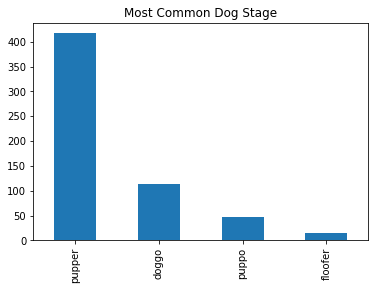

In [79]:
most_common_dog_stage = twitter_archive_master.dog_stage.value_counts()
most_common_dog_stage.plot(kind="bar")
plt.title("Most Common Dog Stage")
plt.show()

### What dog stage receives the best ratings?

In [86]:
avg_rating= twitter_archive_master.groupby(["dog_stage"])["rating_numerator"].mean()
avg_rating.sort_values(ascending=False, inplace=True)
avg_rating

dog_stage
puppo      12.687500
doggo      12.342105
floofer    12.000000
pupper     10.978417
Name: rating_numerator, dtype: float64

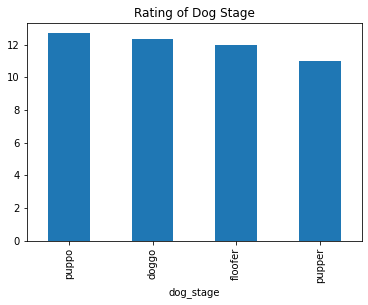

In [87]:
avg_rating.plot(kind="bar")
plt.title("Rating of Dog Stage")
plt.show()